# MA456 Numerical Analysis
## Graded Homework 2

Jonathan Kelley

## Question 1:

Use a computing method to find the largest root of a function using Newton and Secant methods.
- Easy to change inputs
- Include tolerance
- Include maximum iterations
- Include error term
 

The function in question:

$f(x) = x^6 - x - 1$
    

The function and its derivative as code:

In [1]:
def f(x):
    return x**6.0 - x - 1.0

def df(x):
    return 6.0*x**5.0 - 1.0

Basic variables:

In [2]:
guess = 1.0
guess_2 = 2.0 # used only for Secant Method
tolerance = .00001
maximum_iterations = 10000

### Newton's Method Code:

In [3]:
def newtons_method(f, df, x0 = 0, tol = 1e-6, max_iter = 1000, target = 0, verbose=False):
    iter = 0
    diff = abs(0-(f(x0)-target))
    while diff>tol and iter<max_iter:
        iter+=1
        if verbose:
            print("x0, ", x0)
            print("f(x0)", f(x0))
            print("df(x0)", df(x0))
            print("diff: ", diff)

        x0 = x0-f(x0)/df(x0)
        diff = abs(0-(f(x0)-target))
        
    print('Root is at: ', x0)
    print('f(x) at root is: ', f(x0))
    print('')
    print('Took ', iter, " iterations to complete")
    #print('Difference to solution was ', x0 - 1.1347 )
    

In [4]:
newtons_method(f,df, guess, tolerance, maximum_iterations)

Root is at:  1.1347242213865578
f(x) at root is:  8.537194391422531e-07

Took  4  iterations to complete


### Secant Method Code:

In [5]:
def secant_method(f, x0, x1, tol = 1e-6, max_iter = 1000):
    iter = 0
    diff = abs(0-f(x0))
    while diff > tol and iter < max_iter:
        iter+=1
        x2 = x1 - f(x1)*((x1-x0)/(f(x1)-f(x0)))
        diff = abs(x2 - x1)
        x0 = x1
        x1 = x2
        
        
    print('Root is at: ', x2)
    print('f(x) at root is: ', f(x2))
    print('')
    print('Took ', iter, " iterations to complete")
    #print('Difference to solution was ', x0 - 1.1347 )

    

In [6]:
secant_method(f, guess, guess_2, tolerance, maximum_iterations)

Root is at:  1.1347241383964999
f(x) at root is:  -5.164002558899483e-11

Took  8  iterations to complete


### #1 Conclusions

Both methods resulted in roots near 1.134724 in less nine iterations. Newton's method converged faster in 4 iterations vs 8 for secant method.

## Question 2:

A trough of length L has a cross section in the shape of a semicircle with radius $r$. When filled with water to within a distance $h$ of the top, the volume $V$ of the water is

$ V = L \cdot  (0.5\pi r^2 - r^2arcsin(h/r)-h(r^2-h^2)^{1/2} ))) $

Suppose $L = 15$ft, $r=2.0$ft, and $V = 75.0 ft^3$. Find the depth of the water in the trough to within .0001 ft. Use Newton;s method and one other method of your choosing.

First, set the function equal to zero.

$ 0 = L \cdot  (0.5\pi r^2 - r^2arcsin(h/r)-h(r^2-h^2)^{1/2} ))) - V $

Next, sub in the constants.

$ 0 = 15 \textrm{ ft} \cdot  (0.5\pi (2.0\textrm{ ft})^2 - r^2arcsin(h/2.0\textrm{ ft})-h(2.0\textrm{ ft}^2-h^2)^{1/2} ))) - 75.0\textrm{ ft^3} $

Evaluate:

$ 0 = 19.25 \textrm{ ft}^3 - 15 ft \cdot (r^2arcsin(h/2.0\textrm{ft}) + h(2.0\textrm{ft}^2-h^2)^{1/2} ))) $

For the derivative, we just used Wolfram Alpha. Python also has a CAS library but WA is simple enough.

In [7]:
from math import pi, asin, sqrt
L = 15.0 #ft
r = 2.0  #ft
V = 75.0 #ft

def f(x):
    h = x
    return (L*(0.5*pi*r**2.0 - (r**2.0)*asin(h/r)-h*(r**2.0 - h**2.0)**0.5))-V
    
def df(x):
    h = x
#    return (-L * r**2.0 - L * abs(r)*(r**2.0 - h**2.0)+L*(h**2.0)*r)/(sqrt(r**2.0 - h**2.0)*r)
    return (L*(-r*abs(r)+2*h**2.0-r**2.0))/sqrt(r**2.0-h**2.0)

As a "sanity check," let's graph the data from 0 to r.

Text(0.5,1,'Derivative of volume function from 0 to trough height')

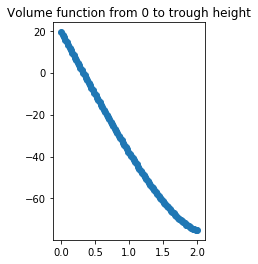

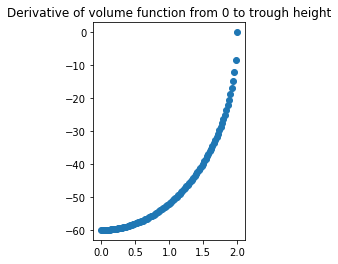

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f_v = np.vectorize(f)
ys = np.linspace(0, r-.00000001, 100)
plt.figure()
y_vals = f_v(ys)
plt.figure()
plt.subplot(1,2,1)
plt.scatter(ys, y_vals)
plt.title("Volume function from 0 to trough height")

f_v = np.vectorize(df)
ys = np.linspace(0, r-.00000001, 100)
plt.figure()
y_vals = f_v(ys)
plt.subplot(1,2,2)
plt.scatter(ys, y_vals)
plt.title("Derivative of volume function from 0 to trough height")




So, as the height from the top of the water increases, the volume decreases. Essentially, as the tub drains, it loses volume. 

We can use the "target" argument to our Newton's method function to approximate the root of the function around any value by shifting the function. In this instance, we can use a target value of 75 as reflected in the "-V" in the f(x) function. The other input variables can remain the same.

In [9]:
newtons_method(f,df, guess, tolerance, maximum_iterations)

Root is at:  0.322195430477312
f(x) at root is:  3.251169289342215e-08

Took  3  iterations to complete


In [10]:
secant_method(f, guess, guess_2, tolerance, maximum_iterations)

Root is at:  0.32219543120314253
f(x) at root is:  -1.0469307198945899e-08

Took  5  iterations to complete


Both Newton's Method and the Secant Method return values of about 0.32219543 in under 6 iterations.

## Question 3:

Consider the function:
$f_1(x) = (x-3.2)^3 (x-2.1) = x^4 - 11.7x^3 + 50.88x^2 - 97.280x + 68.8128$

- Tolerance of $10^-7$
- Maximum of 25 iterations
- Initial points [2.5,3.5]
- Initial point of 3.0 for Newton's Method


In [11]:
guess = 3.0
tolerance = 1e-7
maximum_iterations = 25

In [12]:
def f(x):
    return x**4.0 - 11.7*x**3.0 + 50.88*x**2.0 - 97.280*x + 68.8128

def df(x):
    return 4.0*x**3.0 - 35.1*x**2.0 + 101.76*x - 97.280



### Bisection Method Code

In [13]:
def bisection_method(f, a, b, tolerance, maximum_iterations):
    iter = 0
    while (b-a)/2.0 > tolerance:
        iter +=1
        midpoint = (a+b)/2.0
        if f(midpoint) == 0:
            return(midpoint, iter)
        elif f(a)*f(midpoint)<0:
            b = midpoint
        else:
            a = midpoint
    return(midpoint, iter)

In [14]:
bisection_method(f, 2.5, 3.5, tolerance, maximum_iterations)

(3.1999839544296265, 23)

In [15]:
newtons_method(f,df, guess, tolerance, maximum_iterations)

Root is at:  3.1968696696298617
f(x) at root is:  -3.3645378039182106e-08

Took  10  iterations to complete


23 Iterations with Bisection vs 10 Iterations with Newton's Method

### Question 3b:

Try with function $x^2 -5.3x + 6.72$

In [16]:
def f(x):
    return x**2.0 - 5.3*x + 6.72

def df(x):
    return 2.0*x - 5.3

In [17]:
bisection_method(f, 2.5, 3.5, tolerance, maximum_iterations)

(3.1999999284744263, 23)

In [18]:
newtons_method(f,df, guess, tolerance, maximum_iterations)

Root is at:  3.2000000000389024
f(x) at root is:  4.2793324439571734e-11

Took  4  iterations to complete


Bisection method took 23 iterations to complete vs only 4 with Newton's Method.

Despite having a simpler function, the bisection method still required 23 iterations to find the root while the Newton's method dropped from 10 iterations to 4 iterations. 

The bisection method above calls the f(x) function 3 times per call -- just as many as Newton's method.

Using the %timeit command, Newton's method takes 815 µs per run while the bisection method takes 19.2 µs per run. Each call of f(x) and df(x) takes about 180 ns to run, so the code is likely just unoptimized.

Interestingly, the scipy package implements its own bisection method which also converges after 23 iterations. This function, written in C, takes only 13.2 µs to converge. The optimized Newton's method is hands-down the fastest at 4.4 µs.

In [20]:
import scipy.optimize as optimize
import numpy as np

%timeit optimize.bisect(f, 2.5, 3.5)
%timeit optimize.newton(f, 3, df, tol=1e-7) # With derivative
%timeit optimize.newton(f, 3, tol=1e-7)     # Secant method


12.7 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.17 µs ± 61 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.45 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Newton's method is significantly faster than bisection -- up to 3 times for optimized C versions. This isn't really surprising as Newton's method uses both the function and its derivative to predict roots. In control theory, this is akin to using a PD controller versus just a simple P controller. Both will work, but a PD controller will respond much faster than a P controller.

## Question 4:


Newton's method is the most effective method for all different functions studied in this paper. It converges in the fewest iterations and is significantly faster for polynomials than the bisection or secant methods. Computationally, Newton's method with derivative outperformed all other methods, but the secant method was a close second. 

Overall, I would most likely choose to use the secant method because it is quick, simple, and does not require computation of complicated derivatives. It can easily handle transcendental functions and can be shifted to target any value within a given domain. The need to have a second bound significantly outweighs the need to have a derivative. Given a polynomial, Newton's method might be slightly faster with a fairly simple-to-compute derivative.